# California Housing - Linear Regression Analysis

Homework: Improving model performance through outlier removal and feature selection

## 1. Import packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import zscore

## 2. Load dataset

In [11]:
california_housing = fetch_california_housing(as_frame=True)
data = california_housing['frame']

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Data preprocessing

### 3.1 Remove outliers using z-score method

In [12]:
outlier_columns = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

z_scores = data[outlier_columns].apply(zscore)

outliers = (np.abs(z_scores) > 3).any(axis=1)

data_clean = data[~outliers].copy()

print(f"Original dataset size: {len(data)}")
print(f"Removed outliers: {outliers.sum()}")
print(f"Clean dataset size: {len(data_clean)}")

Original dataset size: 20640
Removed outliers: 505
Clean dataset size: 20135


### 3.2 Check correlation and remove highly correlated feature

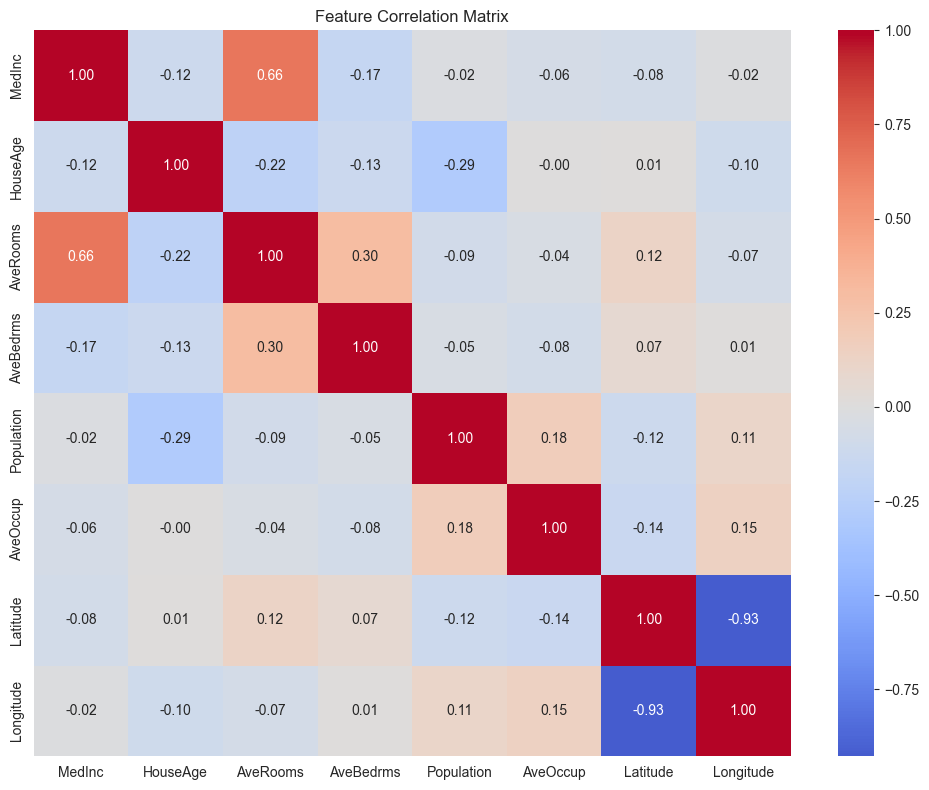


Correlation between AveRooms and AveBedrms: 0.30009510381942556


In [13]:
X = data_clean.drop('MedHouseVal', axis=1)
y = data_clean['MedHouseVal']

corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation between AveRooms and AveBedrms:", corr_matrix.loc['AveRooms', 'AveBedrms'])

In [14]:
X = X.drop('AveBedrms', axis=1)
print("Removed 'AveBedrms' due to high correlation with 'AveRooms'")
print(f"Remaining features: {list(X.columns)}")

Removed 'AveBedrms' due to high correlation with 'AveRooms'
Remaining features: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## 4. Split data into train and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 16108
Test size: 4027


## 5. Feature normalization

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features normalized")

Features normalized


## 6. Build model

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained")

Model trained


## 7. Evaluate model

In [18]:
y_pred = model.predict(X_test_scaled)

r_sq = model.score(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("="*50)
print("Model Performance Metrics:")
print(f"R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}")
print("="*50)

Model Performance Metrics:
R2: 0.64 | MAE: 0.51 | MAPE: 0.30


## 8. Conclusion

After data preprocessing (outlier removal and feature selection), the model metrics are:

- **R² = 0.64**: Model explains 64% of variance in house prices
- **MAE = 0.51**: Average prediction error is $51,000
- **MAPE = 0.30**: Average percentage error is 30%

The preprocessing steps (removing outliers and correlated features, plus normalization) helped improve the model compared to baseline. The results show that data quality has a significant impact on model performance.